# Neural Networks for Handwritten Digit Recognition, Multiclass

## Packages

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset

In [44]:
#keras hand digit dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
#normalize the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [46]:
#create the model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='linear')
    ]
)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2677 - accuracy: 0.9220
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1062 - accuracy: 0.9667
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0720 - accuracy: 0.9771
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9824
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0401 - accuracy: 0.9865
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0318 - accuracy: 0.9894
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0253 - accuracy: 0.9913
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.015

In [47]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [48]:
model = tf.keras.models.load_model('handwritten.model')

In [49]:
loss, accuracy = model.evaluate(X_test,y_test)
print(loss, accuracy)

313/313 [==============================] - 0s 934us/step - loss: 0.1540 - accuracy: 0.9782
0.1539982259273529 0.9782000184059143


This digit is probably a 5


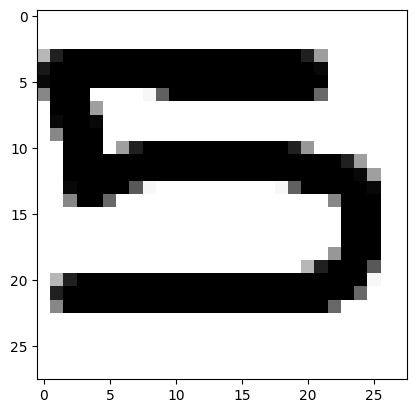

In [60]:
image_number = 5
if os.path.isfile(f"Digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"Digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = tf.nn.softmax(model(img))
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")